In [1]:
from matplotlib import pyplot as plt

Значения выборки и их сортировка

In [2]:
data = [517_000, 580_000, 645_000, 585_000, 670_000, 720_000, 865_000, 367_000, 650_000,
        650_000, 750_000, 635_000, 720_000, 660_000, 650_000, 1_000_000, 700_000, 1_050_000,
        745_000, 710_000, 870_000, 650_000, 680_000, 590_000, 748_000, 760_000, 650_000,
        699_999, 850_000, 750_000, 730_000, 695_000, 670_000, 690_000, 550_000, 630_000,
        690_000, 1_150_000, 730_000, 697_000, 675_000, 720_000, 530_000, 520_000, 669_000,
        699_000, 700_000, 799_000, 610_000, 750_000, 670_000, 750_000, 700_000, 840_000,
        680_000, 750_000, 605_000, 600_000, 820_000, 650_000, 747_000, 780_000, 680_000,
        720_000, 720_000, 520_000, 586_000, 725_000, 695_000, 850_000, 679_000, 648_000,
        750_000, 735_000, 1_150_000, 669_000, 735_000, 695_000, 690_000, 625_000, 640_000,
        650_000, 750_000, 808_000, 730_000, 684_900, 680_000, 640_000, 685_000, 630_000,
        544_721, 700_000, 750_000, 750_000, 550_000, 639_000, 596_000, 660_000, 500_000,
        580_000, 600_000, 599_000, 550_000, 660_000, 600_000, 680_000, 710_000, 800_000]  # ценники на Nissan Qashqai 2008 с сайта Авто.ру
data.sort()

Обработка основными статистическими методами

In [3]:
length = len(data)
mean = round(sum(data) / length, 2)  # среднее арифметическое
median = (data[(length + 1) // 2 - 1] + data[length // 2]) // 2  # медиана
scope = data[-1] - data[0]  # размах
variance = round(sum(map(lambda x: (x - mean) ** 2, data)) / length, 2)  # дисперсия
standard_deviation = round(variance ** 0.5, 2)  # среднеквадратическое отклонение
variation_coef = round(standard_deviation / mean * 100, 2)  # коэффициент вариации
oscillation_coef = round(scope / mean * 100, 2)  # коэффициент осцилляции

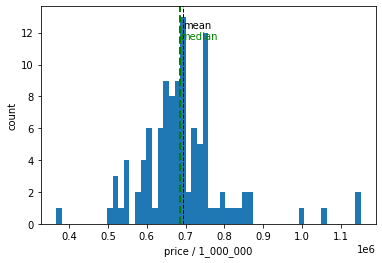

In [16]:
plt.hist(data, bins=length // 2)
plt.xlabel('price / 1_000_000')
plt.ylabel('count')
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean, max_ylim*0.9, 'mean', color='k')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(median, max_ylim*0.85, 'median', color='g')
plt.show()

In [5]:
# первый вариант доверительного интервала
p11 = round(median - standard_deviation, 2)
p12 = round(median + standard_deviation, 2)
# второй вариант доверительного интервала, пусть точность равна 0,95 -> 1,96 по т. Лапласса
accuracy = round(1.96 * standard_deviation / length ** 0.5, 2)  # точность оценки
p21 = round(mean - accuracy, 2)
p22 = round(mean + accuracy, 2)

In [6]:
print(p11, p12)
print(p21, p22)

571176.52 798723.48
671612.76 714528.36


Получение реального доверительного интервала на основании двух предыдущих, найденных по разным формулам.

In [7]:
real_p1 = max((p11, p21))
real_p2 = min((p12, p22))

In [8]:
print(real_p1, real_p2)

671612.76 714528.36


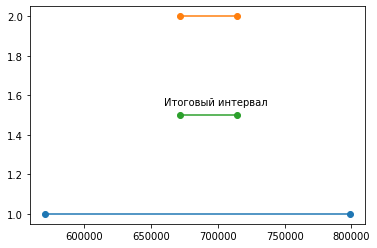

In [25]:
plt.plot([p11, p12], [1, 1], [p21, p22], [2, 2], [real_p1, real_p2], [1.5, 1.5], marker='o')
plt.text(660_000, 1.55, r'Итоговый интервал', fontsize=10)
plt.show()

In [11]:
sorted_data = list(filter(lambda x: real_p1 <= x <= real_p2, data))  # очиста данных

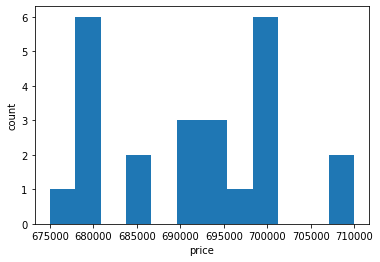

In [13]:
plt.hist(sorted_data, bins=len(sorted_data) // 2)
plt.xlabel('price')
plt.ylabel('count')
plt.show()